In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [2]:
##Import the modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
#-----------------------------------------------------##
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, Matern

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from scipy.stats import norm
from scipy.stats import skew,kurtosis

In [4]:
import csv
import os
from sklearn.cross_decomposition import PLSRegression
from sklearn import svm
from sklearn.svm import SVR
import xgboost as xgb

In [5]:
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns', 1000)


In [6]:
Descriptor = pd.read_csv("ABX2_complexity5_3D.csv")
Descriptor.sample(2)

,compound,BandGap,Volume,vand_rad_Avg,vand_rad_Min,vand_rad_Max,cov_rad_Avg,cov_rad_Min,cov_rad_Max,atom_rad_Avg,atom_rad_Min,atom_rad_Max,density_Avg,density_Min,density_Max,d001,d002,d003,bandgap_SISSO
38,GaInAs2,0.43,406.71,188.33,185,193,127.67,119,142,133.33,115,155,6.32,5.73,7.31,15.040357,-2223.192171,0.000416,0.391411
3,AlGaN2,4.59,178.46,175.33,155,187,104.67,71,122,106.67,65,130,3.14,0.81,5.91,39.221053,85.236390,-0.005905,4.671085


In [7]:
Descriptor = Descriptor.drop(['d001', 'd002', 'd003', 'bandgap_SISSO'], axis=1)

In [8]:
Descriptor.keys()

Index(['compound', 'BandGap', 'Volume', 'vand_rad_Avg', 'vand_rad_Min',
       'vand_rad_Max', 'cov_rad_Avg', 'cov_rad_Min', 'cov_rad_Max',
       'atom_rad_Avg', 'atom_rad_Min', 'atom_rad_Max', 'density_Avg',
       'density_Min', 'density_Max'],
      dtype='object')

In [9]:
Descriptor1 = Descriptor.copy()
Descriptor1=Descriptor1.round(decimals =2)
Descriptor1.head(2)

,compound,BandGap,Volume,vand_rad_Avg,vand_rad_Min,vand_rad_Max,cov_rad_Avg,cov_rad_Min,cov_rad_Max,atom_rad_Avg,atom_rad_Min,atom_rad_Max,density_Avg,density_Min,density_Max
0,ZnGeN2,2.44,181.39,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13
1,ZnGeN2,3.02,181.83,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13


In [10]:
Descriptor1.shape

(92, 15)

In [ ]:
#print(Descriptor1.info(verbose = True))

In [11]:
ML_data = Descriptor1.copy()
ML_data['Index'] = ML_data.index
ML_data.head(2)

,compound,BandGap,Volume,vand_rad_Avg,vand_rad_Min,vand_rad_Max,cov_rad_Avg,cov_rad_Min,cov_rad_Max,atom_rad_Avg,atom_rad_Min,atom_rad_Max,density_Avg,density_Min,density_Max,Index
0,ZnGeN2,2.44,181.39,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13,0
1,ZnGeN2,3.02,181.83,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13,1


In [12]:
ML_data.keys()

Index(['compound', 'BandGap', 'Volume', 'vand_rad_Avg', 'vand_rad_Min',
       'vand_rad_Max', 'cov_rad_Avg', 'cov_rad_Min', 'cov_rad_Max',
       'atom_rad_Avg', 'atom_rad_Min', 'atom_rad_Max', 'density_Avg',
       'density_Min', 'density_Max', 'Index'],
      dtype='object')

In [13]:
ML_data1 = ML_data.drop(['Index'], axis=1)

In [ ]:
#ML_data1.info()

In [ ]:
#ML_data1.keys()

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from scipy.cluster.hierarchy import dendrogram, linkage

# Load data
df = ML_data1.copy()  # Assuming ML_data1 is already in memory


2025-08-06 15:39:13.788684: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-06 15:39:13.856875: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-06 15:39:14.093837: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-06 15:39:14.093971: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-06 15:39:14.155784: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [17]:
# Select only numerical columns for analysis (exclude 'material')
features = df.drop(columns=['compound'])
#features = df[['BandGap', 'Volume','vand_rad_Avg','cov_rad_Avg','atom_rad_Avg','density_Avg']]
#features = df[['BandGap', 'Volume']]
#features = Descriptor[['d001', 'd002', 'd003']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)  # Standardize data


In [18]:
features.keys()

Index(['BandGap', 'Volume', 'vand_rad_Avg', 'vand_rad_Min', 'vand_rad_Max',
       'cov_rad_Avg', 'cov_rad_Min', 'cov_rad_Max', 'atom_rad_Avg',
       'atom_rad_Min', 'atom_rad_Max', 'density_Avg', 'density_Min',
       'density_Max'],
      dtype='object')

# K-Means Clustering

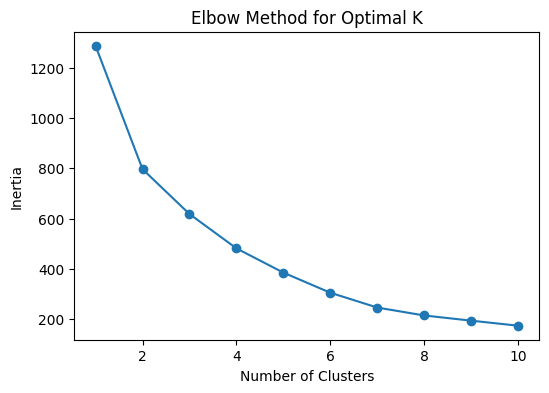

In [19]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


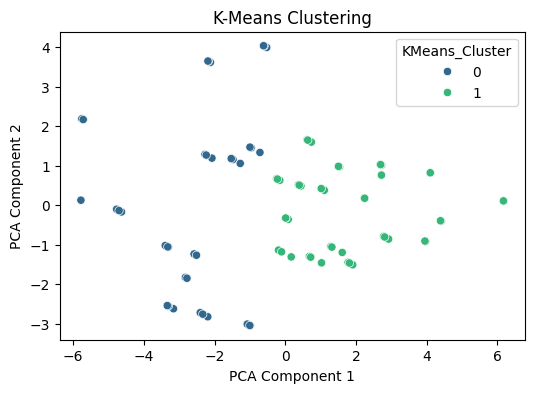

In [20]:
# Fit KMeans with optimal K (assuming 3 from elbow method)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Plot clusters using PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['KMeans_Cluster'], palette='viridis')
# ## Make wrt to bandgap
# sc =plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['BandGap'], cmap='Set1', s=50, edgecolor='k')
# # Add colorbar
# cbar = plt.colorbar(sc)
# cbar.set_label('bandgap (eV)', fontsize=12)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering")
plt.show()


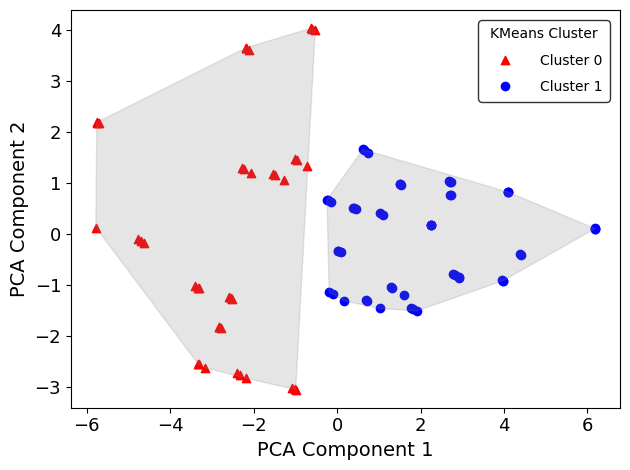

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import ConvexHull
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Fit KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=100)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = X_pca[:, 0], X_pca[:, 1]
#plt.figure(figsize=(7,5), dpi=400)

# Define custom colors and markers
colors = ['red', 'blue', 'brown']
markers = [ '^','o', 'D']

# Sort cluster labels to ensure order 0, 1, 2
sorted_clusters = sorted(df['KMeans_Cluster'].unique())

# Plot each cluster separately to control marker styles
for cluster, color, marker in zip(sorted_clusters, colors, markers):
    cluster_data = df[df['KMeans_Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'],
                label=f'Cluster {cluster}', color=color, marker=marker)

# Draw convex hulls around each cluster
for cluster in sorted_clusters:
    cluster_points = df[df['KMeans_Cluster'] == cluster][['PCA1', 'PCA2']].values
    if len(cluster_points) >= 2:  # ConvexHull needs at least 2 points
        hull = ConvexHull(cluster_points)
        hull_vertices = cluster_points[hull.vertices]
        plt.fill(hull_vertices[:, 0], hull_vertices[:, 1], alpha=0.2, color='gray')
# Customize axis labels and ticks
plt.tick_params(axis='both', which='major', labelsize=13)
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
# Customize legend
legend = plt.legend(title="KMeans Cluster", loc='best', prop={'size': 14}, frameon=True)
legend.get_frame().set_edgecolor('black')  # Make legend border black
for text in legend.get_texts():
    text.set_fontsize(10)  # Set legend label text size
## Make wrt to bandgap
#sc =plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['BandGap'], cmap='Set1', s=50, edgecolor='k')
# Add colorbar
#cbar = plt.colorbar(sc)
#cbar.set_label('bandgap (eV)', fontsize=12)
plt.tight_layout()
#plt.savefig ('Kmeans_cluster.pdf')
plt.show()


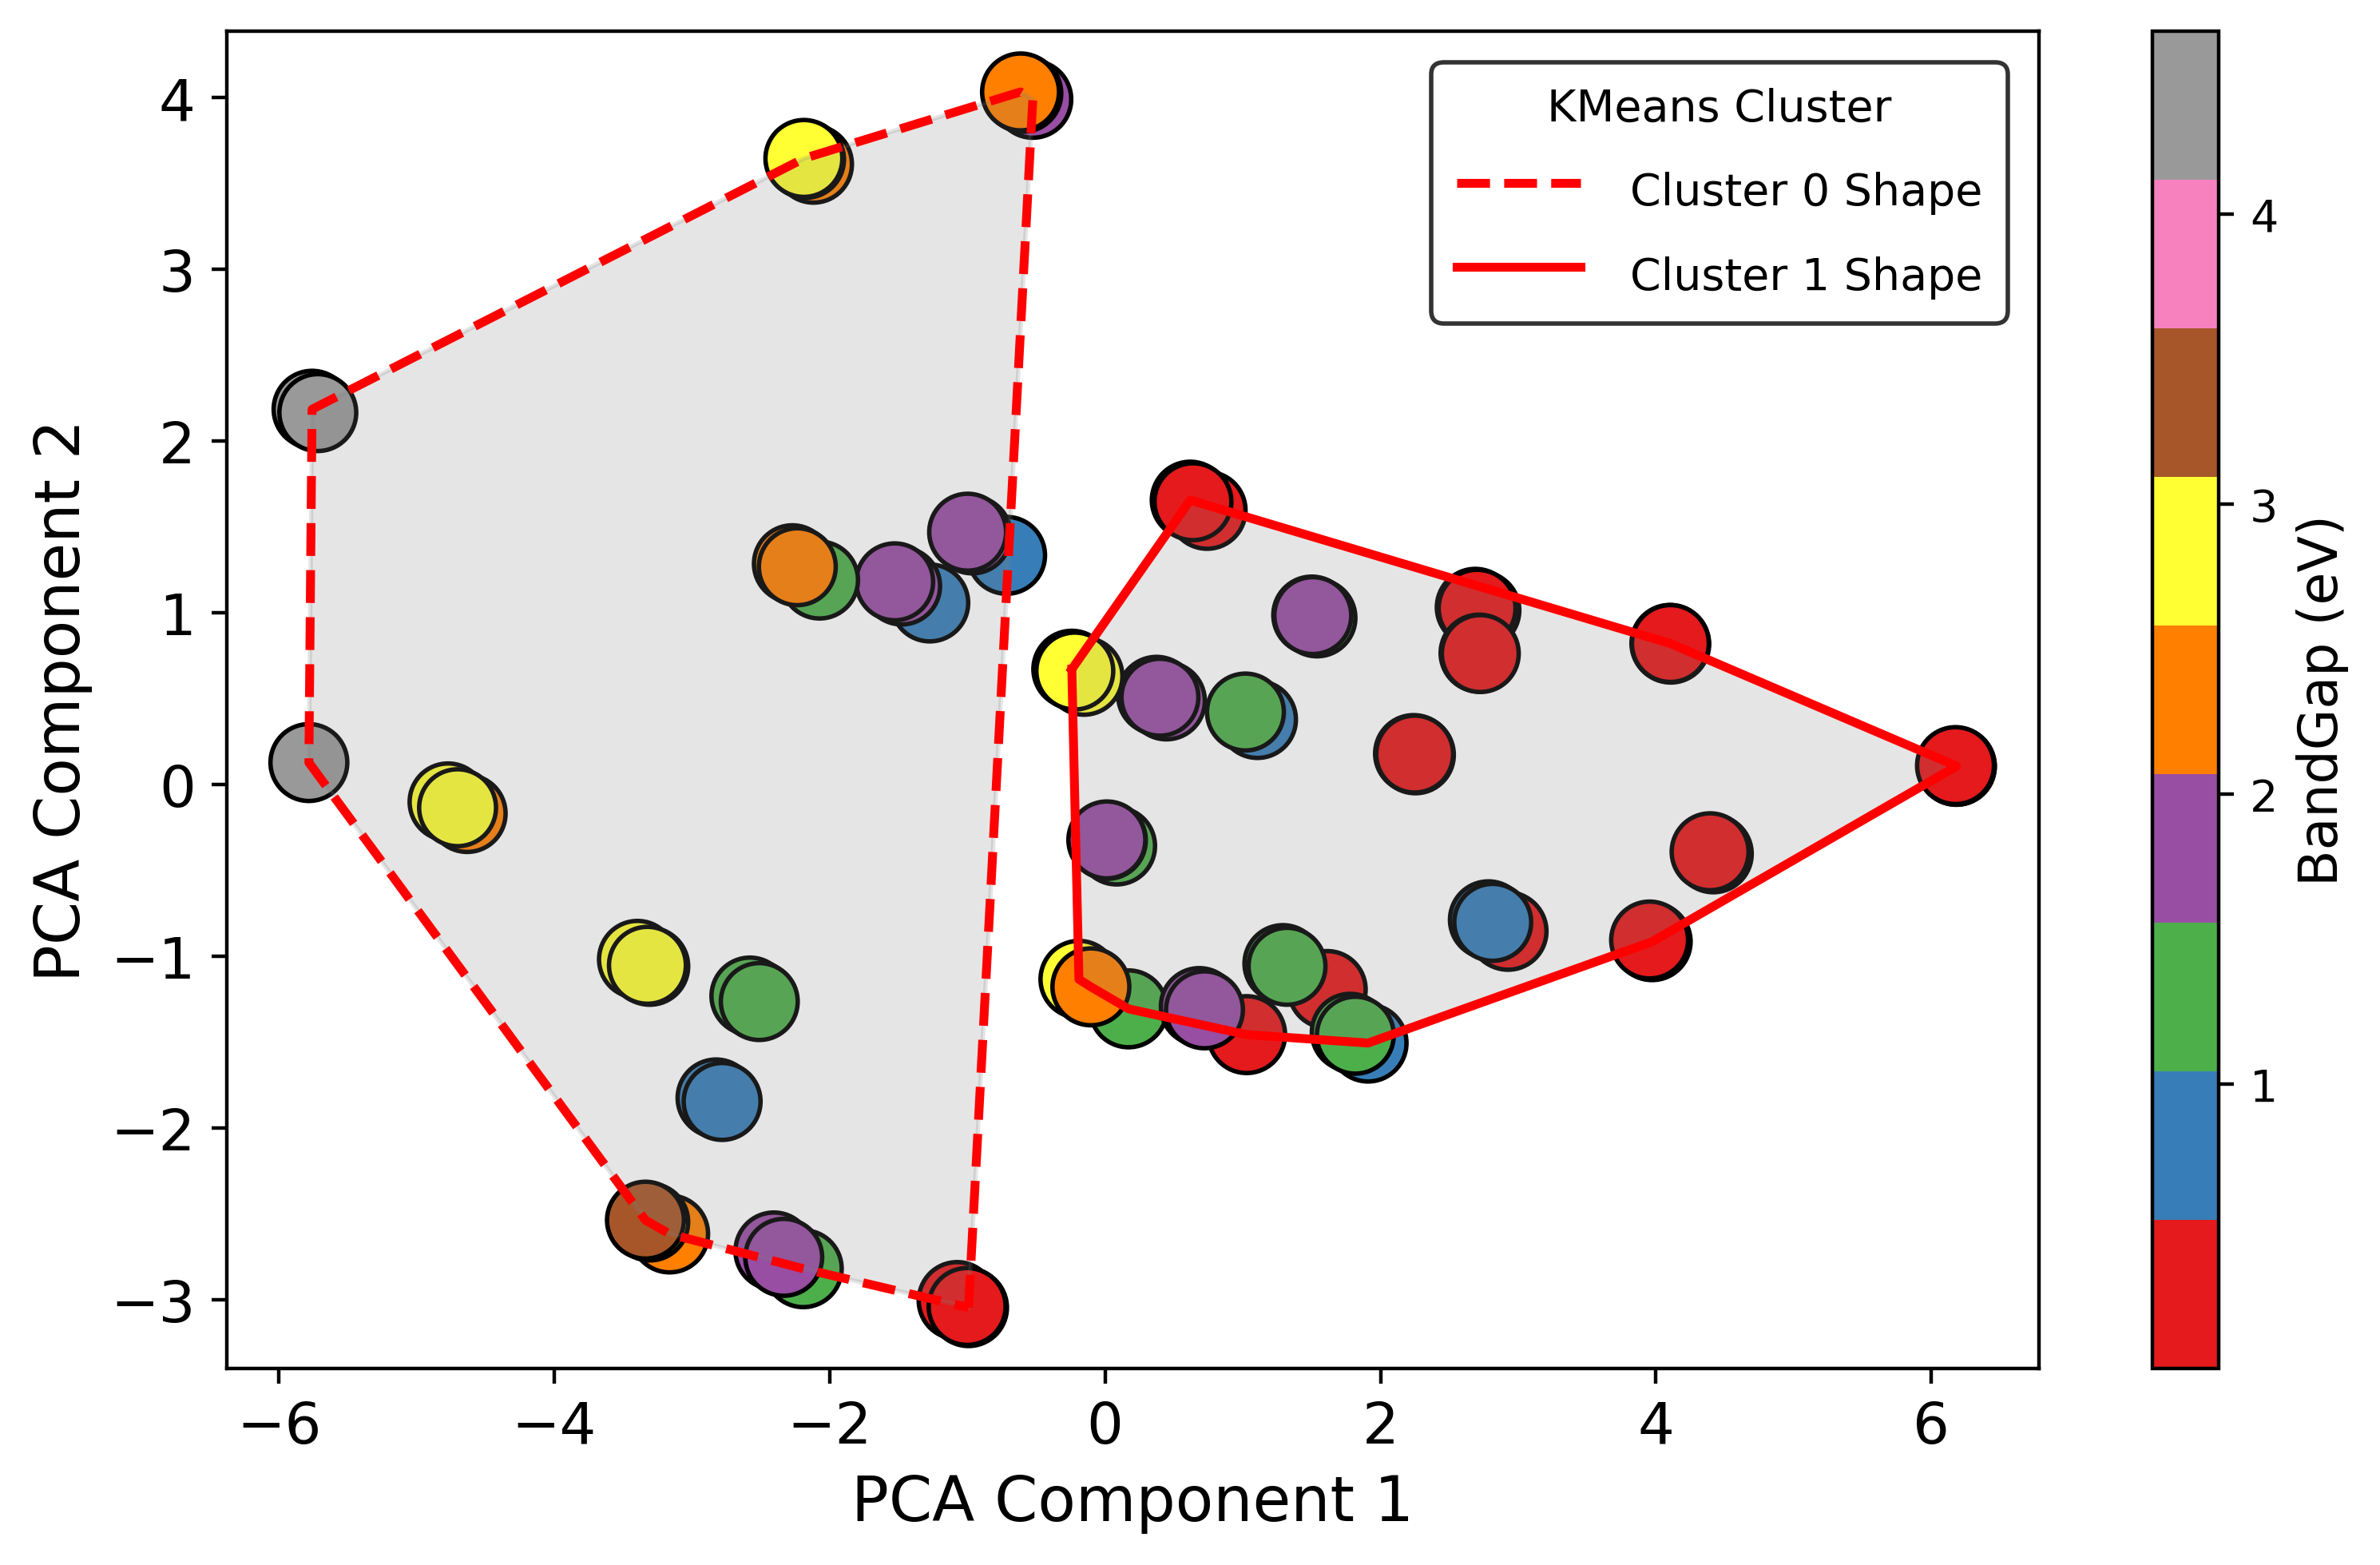

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Assuming previous steps remain the same: KMeans, PCA applied, df ready

plt.figure(figsize=(8,5), dpi=400)

# Scatter plot: color by BandGap
sc = plt.scatter(df['PCA1'], df['PCA2'], c=df['BandGap'], cmap='Set1', s=300, edgecolor='k')

# Define line styles for each cluster boundary
line_styles = ['--', '-']  # cluster 0 dashed, cluster 1 solid

sorted_clusters = sorted(df['KMeans_Cluster'].unique())

for cluster, line_style in zip(sorted_clusters, line_styles):
    cluster_points = df[df['KMeans_Cluster'] == cluster][['PCA1', 'PCA2']].values
    if len(cluster_points) >= 3:
        hull = ConvexHull(cluster_points)
        hull_vertices = np.append(hull.vertices, hull.vertices[0])  # close loop

        # Plot filled gray polygon inside cluster
        plt.fill(cluster_points[hull.vertices, 0], cluster_points[hull.vertices, 1],
                 color='gray', alpha=0.2)

        # Plot cluster boundary with specified line style and black color
        plt.plot(cluster_points[hull_vertices, 0], cluster_points[hull_vertices, 1],
                 linestyle=line_style, linewidth=2, color='red',
                 label=f'Cluster {cluster} Shape')

# Add colorbar for bandgap
cbar = plt.colorbar(sc)
cbar.set_label('BandGap (eV)', fontsize=12)

# Labels and ticks
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=13)

# Legend for cluster shapes
plt.legend(title="KMeans Cluster", fontsize=11, title_fontsize=12, frameon=True)
# Customize legend
legend = plt.legend(title="KMeans Cluster", loc='best', prop={'size': 14}, frameon=True)
legend.get_frame().set_edgecolor('black')  # Make legend border black
for text in legend.get_texts():
    text.set_fontsize(10)  # Set legend label text size
plt.tight_layout()
#plt.savefig('Kmeans_cluster.pdf')
plt.show()
